# Empty-space based filtering

In [2]:
import numpy as np
from numpy import pi as pi
import seaborn as sns
import matplotlib.pyplot as plt
import cmocean
from benchmark_demo.utilstf import *
from methods.method_empty_space import empty_space_denoising
from benchmark_demo.SignalBank import SignalBank

In [3]:
np.random.seed(0) 

# signal parameters
SNRin = 15
N = 2**10
Nsub = N//2
sbank = SignalBank(N=N)
tmin = sbank.tmin
tmax = sbank.tmax


s = sbank.signal_linear_chirp()
# s = sbank.signal_cos_chirp()
# s = sbank.signal_mc_multi_cos()
# s = sbank.signal_mc_multi_linear()
# s = sbank.signal_mc_synthetic_mixture()
# s = sbank.signal_mc_synthetic_mixture_2()
# s = sbank.signal_mc_impulses()
signal, noise = add_snr(s,SNRin)
signal = s + noise*np.sqrt(N/Nsub) 

snr_out:15.0


In [4]:
Nfft = 2*N
g,_ = get_round_window(Nfft)
S, stft, stft_padded, Npad = get_spectrogram(signal, window = g)
radius = 0.95
output = empty_space_denoising(signal,
                                radi_seg=radius,
                                radi_expand=radius,
                                adapt_thr=False,
                                return_dic=True)
s_r, mask = (output[key] for key in ('s_r','mask')) 

s_r_e = s_r[tmin:tmax]
s_e = s[tmin:tmax]                                    
print("QRF={}".format(10*np.log10((np.sum(s_e**2))/(np.sum((s_e-s_r_e)**2)))))

QRF=21.860508771439836


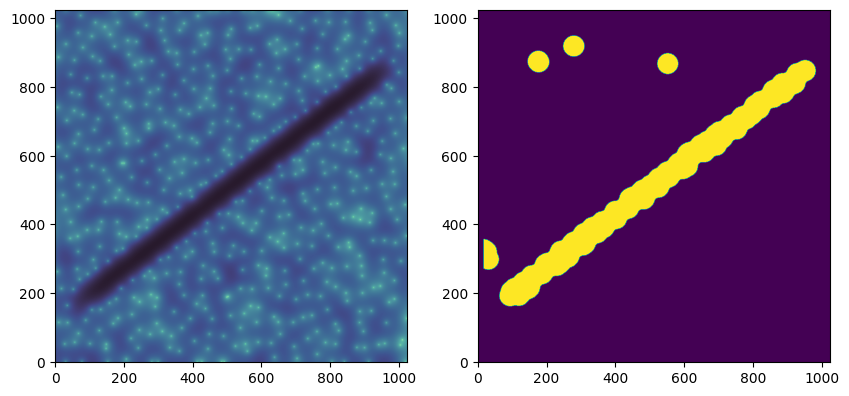

In [4]:
fig, ax = plt.subplots(1,2,figsize = (10,5))
ax[0].imshow(np.log10(S), origin='lower', cmap=cmocean.cm.deep)
ax[1].imshow(mask, origin='lower')
plt.show()